In [20]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

df.dropna(subset=["director"], inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


type
Movie      5943
TV Show     230
Name: count, dtype: int64


<Axes: xlabel='type', ylabel='count'>

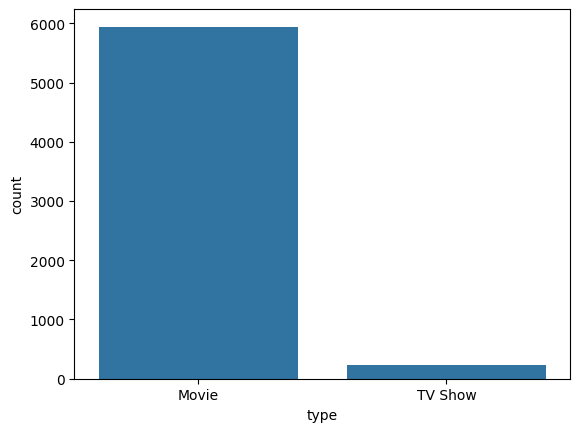

In [21]:
print(df["type"].value_counts())

type_Count = df["type"].value_counts().reset_index()


type_Count.columns = ["type", "count"]

sns.barplot(data = type_Count, x = "type", y = "count")

In [22]:
top_10_countries = df.groupby("country")["type"].count()
top_10_countries.sort_values(ascending=False).head(10)


country
United States     2048
India              890
United Kingdom     212
Canada             119
Spain              106
Egypt               90
Nigeria             90
Japan               85
France              81
Turkey              79
Name: type, dtype: int64

In [23]:
Genre = df["listed_in"].str.split(", ")

Genre.value_counts().sort_values(ascending=False).head(5)


listed_in
[Dramas, International Movies]                        361
[Documentaries]                                       334
[Stand-Up Comedy]                                     309
[Comedies, Dramas, International Movies]              271
[Dramas, Independent Movies, International Movies]    252
Name: count, dtype: int64

In [24]:
df.groupby("release_year")["title"].count().sort_values(ascending=False).head(10)

release_year
2017    773
2018    760
2016    653
2019    629
2020    548
2015    400
2021    297
2014    267
2013    225
2012    175
Name: title, dtype: int64

In [25]:
df["rating"].value_counts()

rating
TV-MA       2117
TV-14       1457
R            795
TV-PG        538
PG-13        489
PG           286
TV-Y7        132
TV-G         118
TV-Y         112
NR            75
G             41
TV-Y7-FV       4
UR             3
NC-17          2
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [26]:
df.groupby("director")["title"].count().sort_values(ascending=False)

director
Rajiv Chilaka                                                 19
Raúl Campos, Jan Suter                                        18
Suhas Kadav                                                   16
Marcus Raboy                                                  16
Jay Karas                                                     14
                                                              ..
Álvaro Delgado-Aparicio L.                                     1
Álvaro Brechner                                                1
Zuko Nodada                                                    1
Zsolt Pálfi                                                    1
Zoya Akhtar, Karan Johar, Anurag Kashyap, Dibakar Banerjee     1
Name: title, Length: 4528, dtype: int64

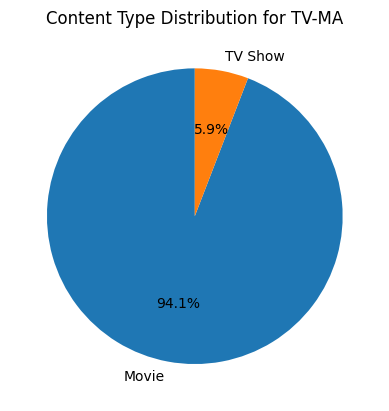

In [ ]:


# Count how many of each type exist in each rating
data_pie = df.groupby(["rating", "type"]).size()

# Example: Pick one rating (say "TV-MA") and plot its type distribution
rating_choice = "TV-MA"
subset = data_pie.loc[rating_choice]

plt.pie(
    subset,
    labels=subset.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Content Type Distribution for {rating_choice}")
plt.show()


<Axes: xlabel='release_year', ylabel='count'>

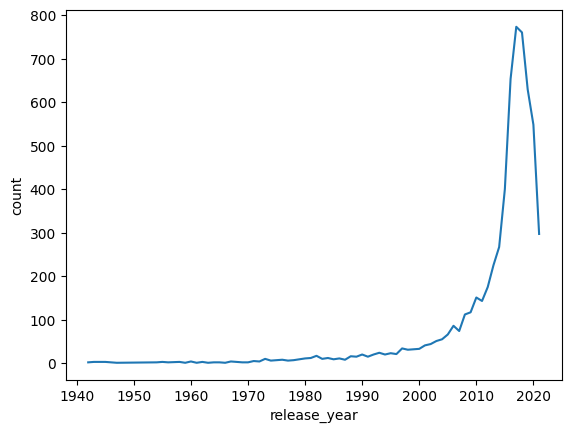

In [39]:
releases_per_year = df["release_year"].value_counts().sort_index().reset_index()
releases_per_year.columns = ["release_year", "count"]
releases_per_year
sns.lineplot(data = releases_per_year, x="release_year", y="count")


